In [1]:
! pip install easyocr==1.2.4
! pip install imutils

In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import imutils

In [20]:
image = cv2.imread("image3.jpg")

In [21]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

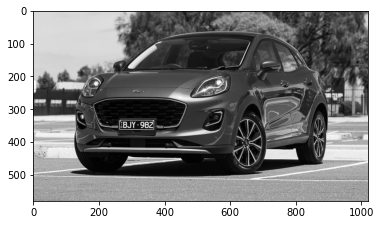

In [22]:
plt.imshow(cv2.cvtColor(gray_image, cv2.COLOR_BGR2RGB))

In [23]:
# applying the filters for noise reduction
bilateral_image = cv2.bilateralFilter(gray_image, 11, 17, 17)

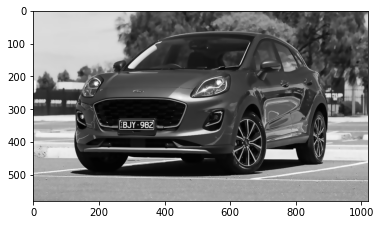

In [24]:
plt.imshow(cv2.cvtColor(bilateral_image, cv2.COLOR_BGR2RGB))

In [25]:
# apply edge detection using canny edge detector
edge_image = cv2.Canny(bilateral_image, 30, 200)

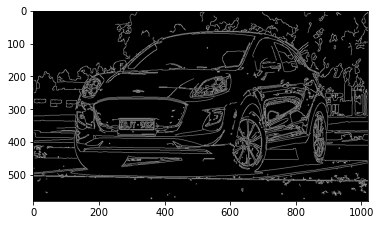

In [26]:
plt.imshow(cv2.cvtColor(edge_image, cv2.COLOR_BGR2RGB))

In [27]:
# Find the Contours
keypoints = cv2.findContours (edge_image, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)
contours = sorted(contours, key= cv2.contourArea, reverse = True)[:10]

In [28]:
location = None
for contour in contours:
    approx = cv2.approxPolyDP(contour, 10, True) # Approximating the polygone for the contour points
    if len(approx) ==4:    # 4 mean polygone has 4 corner points which is will resemble the size of the plate
        location = approx
        break

In [29]:
location

array([[[263, 334]],

       [[264, 363]],

       [[369, 362]],

       [[366, 333]]], dtype=int32)

In [30]:
# Masking with keypoints resembling the polygone with 4 corner points
mask = np.zeros(gray_image.shape, np.uint8)    # 
new_image = cv2.drawContours(mask, [location], 0, 255, -1)
new_image =cv2.bitwise_and(image, image, mask=mask)

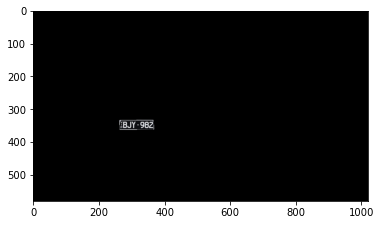

In [31]:
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

In [32]:
!pip install pytesseract

In [33]:
import pytesseract

In [34]:
pytesseract.pytesseract.tesseract_cmd = r'C:\Users\MKR\AppData\Local\Programs\Tesseract-OCR\tesseract.exe'

In [35]:
text = pytesseract.image_to_string(new_image, lang = "eng")

In [36]:
print("Number is :", text)

Number is :  

EBJY - 982,

